## Predict 4L EoS

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
plt.rcParams.update({'font.size': 20})

2022-07-11 12:20:56.087221: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


### 1. Load data from file and prepare for training

Load the EoS and the $M-R$ curves from processed data files.

In [2]:
# Load the un-normalized data.
R = np.loadtxt('../data/m-r_4l.txt')
P = np.loadtxt('../data/eos_4l.txt')

Next, normalize the data and perform a train-test-validation split as 80-15-5.

In [3]:
# Normalize the data
r = (R - np.min(R)) / (np.max(R) - np.min(R))
p = (P - np.min(P)) / (np.max(P) - np.min(P))

# Perform train-test-validation split: 80-15-5
x_tr, x_tv, y_tr, y_tv = train_test_split(r, p, test_size=0.2, random_state=41)
x_ts, x_vl, y_ts, y_vl = train_test_split(x_tv, y_tv, test_size=0.25, random_state=41)

### 2. Build DNN Model or load model from file

Construct a deep-learning neural network (DNN). The architecture and the hyperparameters of the DNN are chosen using `keras_tuner` to optimize for performance and accuracy (see `search/random_search_4l.ipynb`). 

In [11]:
# Load model from file
#model = load_model("../output/model_4l.h5")

# Build model from scratch
model = keras.Sequential([
    layers.Dense(194, input_shape=(97,), activation='relu'),
    layers.Dense(582, activation='relu'),
    layers.Dense(291, activation='relu'),
    layers.Dense(97, activation='linear')])

model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 194)               19012     
_________________________________________________________________
dense_5 (Dense)              (None, 582)               113490    
_________________________________________________________________
dense_6 (Dense)              (None, 291)               169653    
_________________________________________________________________
dense_7 (Dense)              (None, 97)                28324     
Total params: 330,479
Trainable params: 330,479
Non-trainable params: 0
_________________________________________________________________


### 3. Set up callbacks and training parameters

Set values of training parameters: batch size and number of epochs. Also, create optional callbacks such as early stopping and saving weights with checkpointings. 

In [12]:
batch_size = 512
num_epochs = 5000

# Set up a callback to stop early if given criteria is satisfied
stop_early = tf.keras.callbacks.EarlyStopping(monitor='loss', min_delta=1.0e-10, patience=50)

# Setup checkpointing
ckpt_path = "../ckpts/eos_3p.ckpt"
ckpt_dir = os.path.dirname(ckpt_path)

# Set up another callback that saves the model's weights
save_weights = tf.keras.callbacks.ModelCheckpoint(filepath=ckpt_path, save_weights_only=True, verbose=0)

### 4. Fit model and save training history

Train the DNN using training and testing data. Note that we still have unobserved validation data left to be used later for further testing and predicting EoS.

In [13]:
training = model.fit(x=x_tr, y=y_tr, batch_size=batch_size, validation_data=(x_ts, y_ts), \
                    epochs=num_epochs, callbacks=[stop_early, save_weights], verbose=2)

Epoch 1/5000
24/24 - 0s - loss: 0.0160 - val_loss: 0.0059
Epoch 2/5000
24/24 - 0s - loss: 0.0056 - val_loss: 0.0056
Epoch 3/5000
24/24 - 0s - loss: 0.0055 - val_loss: 0.0055
Epoch 4/5000
24/24 - 0s - loss: 0.0054 - val_loss: 0.0055
Epoch 5/5000
24/24 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 6/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0054
Epoch 7/5000
24/24 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 8/5000
24/24 - 0s - loss: 0.0054 - val_loss: 0.0054
Epoch 9/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 10/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 11/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0056
Epoch 12/5000
24/24 - 0s - loss: 0.0054 - val_loss: 0.0053
Epoch 13/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 14/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 15/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 16/5000
24/24 - 0s - loss: 0.0053 - val_loss: 0.0053
Epoch 17/5000
24/24 - 0s - loss: 0.0052 - val_loss: 0.0054
Epoch 

Epoch 140/5000
24/24 - 0s - loss: 0.0043 - val_loss: 0.0043
Epoch 141/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0043
Epoch 142/5000
24/24 - 0s - loss: 0.0043 - val_loss: 0.0050
Epoch 143/5000
24/24 - 0s - loss: 0.0044 - val_loss: 0.0043
Epoch 144/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0045
Epoch 145/5000
24/24 - 0s - loss: 0.0043 - val_loss: 0.0042
Epoch 146/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0057
Epoch 147/5000
24/24 - 0s - loss: 0.0045 - val_loss: 0.0046
Epoch 148/5000
24/24 - 0s - loss: 0.0044 - val_loss: 0.0045
Epoch 149/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0043
Epoch 150/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0045
Epoch 151/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0042
Epoch 152/5000
24/24 - 0s - loss: 0.0043 - val_loss: 0.0043
Epoch 153/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0043
Epoch 154/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0045
Epoch 155/5000
24/24 - 0s - loss: 0.0042 - val_loss: 0.0041
Epoch 156/5000
24/24 - 0s - loss: 0.0042

Epoch 277/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0039
Epoch 278/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 279/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0041
Epoch 280/5000
24/24 - 0s - loss: 0.0041 - val_loss: 0.0039
Epoch 281/5000
24/24 - 0s - loss: 0.0039 - val_loss: 0.0040
Epoch 282/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0039
Epoch 283/5000
24/24 - 0s - loss: 0.0041 - val_loss: 0.0043
Epoch 284/5000
24/24 - 0s - loss: 0.0041 - val_loss: 0.0040
Epoch 285/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 286/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0042
Epoch 287/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0041
Epoch 288/5000
24/24 - 0s - loss: 0.0041 - val_loss: 0.0039
Epoch 289/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 290/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0039
Epoch 291/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0040
Epoch 292/5000
24/24 - 0s - loss: 0.0039 - val_loss: 0.0039
Epoch 293/5000
24/24 - 0s - loss: 0.0040

Epoch 414/5000
24/24 - 0s - loss: 0.0038 - val_loss: 0.0036
Epoch 415/5000
24/24 - 0s - loss: 0.0037 - val_loss: 0.0038
Epoch 416/5000
24/24 - 0s - loss: 0.0038 - val_loss: 0.0047
Epoch 417/5000
24/24 - 0s - loss: 0.0039 - val_loss: 0.0036
Epoch 418/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0037
Epoch 419/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0035
Epoch 420/5000
24/24 - 0s - loss: 0.0037 - val_loss: 0.0041
Epoch 421/5000
24/24 - 0s - loss: 0.0038 - val_loss: 0.0040
Epoch 422/5000
24/24 - 0s - loss: 0.0039 - val_loss: 0.0044
Epoch 423/5000
24/24 - 0s - loss: 0.0040 - val_loss: 0.0037
Epoch 424/5000
24/24 - 0s - loss: 0.0037 - val_loss: 0.0042
Epoch 425/5000
24/24 - 0s - loss: 0.0038 - val_loss: 0.0036
Epoch 426/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0036
Epoch 427/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0036
Epoch 428/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0038
Epoch 429/5000
24/24 - 0s - loss: 0.0037 - val_loss: 0.0038
Epoch 430/5000
24/24 - 0s - loss: 0.0036

Epoch 551/5000
24/24 - 0s - loss: 0.0037 - val_loss: 0.0034
Epoch 552/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0038
Epoch 553/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0034
Epoch 554/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0041
Epoch 555/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0038
Epoch 556/5000
24/24 - 0s - loss: 0.0035 - val_loss: 0.0033
Epoch 557/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0036
Epoch 558/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0036
Epoch 559/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0036
Epoch 560/5000
24/24 - 0s - loss: 0.0036 - val_loss: 0.0040
Epoch 561/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0036
Epoch 562/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0035
Epoch 563/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0035
Epoch 564/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0034
Epoch 565/5000
24/24 - 0s - loss: 0.0034 - val_loss: 0.0036
Epoch 566/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0035
Epoch 567/5000
24/24 - 0s - loss: 0.0033

Epoch 688/5000
24/24 - 0s - loss: 0.0031 - val_loss: 0.0038
Epoch 689/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0030
Epoch 690/5000
24/24 - 0s - loss: 0.0031 - val_loss: 0.0038
Epoch 691/5000
24/24 - 0s - loss: 0.0031 - val_loss: 0.0032
Epoch 692/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0030
Epoch 693/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0032
Epoch 694/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0030
Epoch 695/5000
24/24 - 0s - loss: 0.0031 - val_loss: 0.0036
Epoch 696/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0036
Epoch 697/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0034
Epoch 698/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0036
Epoch 699/5000
24/24 - 0s - loss: 0.0031 - val_loss: 0.0032
Epoch 700/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0039
Epoch 701/5000
24/24 - 0s - loss: 0.0032 - val_loss: 0.0037
Epoch 702/5000
24/24 - 0s - loss: 0.0033 - val_loss: 0.0036
Epoch 703/5000
24/24 - 0s - loss: 0.0032 - val_loss: 0.0036
Epoch 704/5000
24/24 - 0s - loss: 0.0033

Epoch 825/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0030
Epoch 826/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0030
Epoch 827/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0034
Epoch 828/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0031
Epoch 829/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0031
Epoch 830/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0030
Epoch 831/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0029
Epoch 832/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0028
Epoch 833/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0030
Epoch 834/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0029
Epoch 835/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0035
Epoch 836/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0029
Epoch 837/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0034
Epoch 838/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 839/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0032
Epoch 840/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0029
Epoch 841/5000
24/24 - 0s - loss: 0.0028

Epoch 962/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0028
Epoch 963/5000
24/24 - 0s - loss: 0.0026 - val_loss: 0.0027
Epoch 964/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 965/5000
24/24 - 0s - loss: 0.0026 - val_loss: 0.0032
Epoch 966/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0027
Epoch 967/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0030
Epoch 968/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0030
Epoch 969/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0030
Epoch 970/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0031
Epoch 971/5000
24/24 - 0s - loss: 0.0029 - val_loss: 0.0028
Epoch 972/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0029
Epoch 973/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0036
Epoch 974/5000
24/24 - 0s - loss: 0.0030 - val_loss: 0.0033
Epoch 975/5000
24/24 - 0s - loss: 0.0028 - val_loss: 0.0031
Epoch 976/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0030
Epoch 977/5000
24/24 - 0s - loss: 0.0026 - val_loss: 0.0028
Epoch 978/5000
24/24 - 0s - loss: 0.0025

Epoch 1097/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0025
Epoch 1098/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0029
Epoch 1099/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0028
Epoch 1100/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0028
Epoch 1101/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0028
Epoch 1102/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0028
Epoch 1103/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0026
Epoch 1104/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0027
Epoch 1105/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0025
Epoch 1106/5000
24/24 - 0s - loss: 0.0026 - val_loss: 0.0028
Epoch 1107/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0028
Epoch 1108/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 1109/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 1110/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0026
Epoch 1111/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0027
Epoch 1112/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0029
Epoch 1113/5000
24/24 - 

Epoch 1232/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0025
Epoch 1233/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0033
Epoch 1234/5000
24/24 - 0s - loss: 0.0027 - val_loss: 0.0029
Epoch 1235/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0028
Epoch 1236/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 1237/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0030
Epoch 1238/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0024
Epoch 1239/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0024
Epoch 1240/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0026
Epoch 1241/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 1242/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0028
Epoch 1243/5000
24/24 - 0s - loss: 0.0024 - val_loss: 0.0026
Epoch 1244/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0024
Epoch 1245/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0024
Epoch 1246/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0027
Epoch 1247/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0027
Epoch 1248/5000
24/24 - 

Epoch 1367/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 1368/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0029
Epoch 1369/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0023
Epoch 1370/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 1371/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0031
Epoch 1372/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0026
Epoch 1373/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0031
Epoch 1374/5000
24/24 - 0s - loss: 0.0025 - val_loss: 0.0027
Epoch 1375/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0023
Epoch 1376/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0024
Epoch 1377/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0024
Epoch 1378/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 1379/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 1380/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0024
Epoch 1381/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0025
Epoch 1382/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0023
Epoch 1383/5000
24/24 - 

Epoch 1502/5000
24/24 - 0s - loss: 0.0023 - val_loss: 0.0027
Epoch 1503/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0026
Epoch 1504/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 1505/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 1506/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0023
Epoch 1507/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0023
Epoch 1508/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0026
Epoch 1509/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0023
Epoch 1510/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0023
Epoch 1511/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0024
Epoch 1512/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0023
Epoch 1513/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 1514/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 1515/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 1516/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0025
Epoch 1517/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0030
Epoch 1518/5000
24/24 - 

Epoch 1637/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 1638/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0025
Epoch 1639/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 1640/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0028
Epoch 1641/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0023
Epoch 1642/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0027
Epoch 1643/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0025
Epoch 1644/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0027
Epoch 1645/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0022
Epoch 1646/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0027
Epoch 1647/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0027
Epoch 1648/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0022
Epoch 1649/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0022
Epoch 1650/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0029
Epoch 1651/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0025
Epoch 1652/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0024
Epoch 1653/5000
24/24 - 

Epoch 1772/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0023
Epoch 1773/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0025
Epoch 1774/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 1775/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0022
Epoch 1776/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0029
Epoch 1777/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0022
Epoch 1778/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0029
Epoch 1779/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0022
Epoch 1780/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0026
Epoch 1781/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0023
Epoch 1782/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0024
Epoch 1783/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0026
Epoch 1784/5000
24/24 - 0s - loss: 0.0021 - val_loss: 0.0023
Epoch 1785/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0021
Epoch 1786/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 1787/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0027
Epoch 1788/5000
24/24 - 

Epoch 1907/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0023
Epoch 1908/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0022
Epoch 1909/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0021
Epoch 1910/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0032
Epoch 1911/5000
24/24 - 0s - loss: 0.0022 - val_loss: 0.0024
Epoch 1912/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 1913/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0025
Epoch 1914/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 1915/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0023
Epoch 1916/5000
24/24 - 0s - loss: 0.0019 - val_loss: 0.0027
Epoch 1917/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0020
Epoch 1918/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0020
Epoch 1919/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0023
Epoch 1920/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0024
Epoch 1921/5000
24/24 - 0s - loss: 0.0018 - val_loss: 0.0024
Epoch 1922/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0025
Epoch 1923/5000
24/24 - 

Epoch 2042/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0026
Epoch 2043/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0021
Epoch 2044/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0020
Epoch 2045/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0031
Epoch 2046/5000
24/24 - 0s - loss: 0.0020 - val_loss: 0.0022
Epoch 2047/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0020
Epoch 2048/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0022
Epoch 2049/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0021
Epoch 2050/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0023
Epoch 2051/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0021
Epoch 2052/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2053/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2054/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0026
Epoch 2055/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2056/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 2057/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0025
Epoch 2058/5000
24/24 - 

Epoch 2177/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0021
Epoch 2178/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2179/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2180/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0021
Epoch 2181/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0018
Epoch 2182/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0023
Epoch 2183/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0022
Epoch 2184/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0020
Epoch 2185/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0022
Epoch 2186/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0022
Epoch 2187/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0019
Epoch 2188/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0022
Epoch 2189/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0018
Epoch 2190/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0027
Epoch 2191/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0020
Epoch 2192/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0021
Epoch 2193/5000
24/24 - 

Epoch 2312/5000
24/24 - 0s - loss: 0.0017 - val_loss: 0.0019
Epoch 2313/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 2314/5000
24/24 - 0s - loss: 0.0015 - val_loss: 0.0019
Epoch 2315/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0020
Epoch 2316/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 2317/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 2318/5000
24/24 - 0s - loss: 0.0013 - val_loss: 0.0022
Epoch 2319/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0021
Epoch 2320/5000
24/24 - 0s - loss: 0.0013 - val_loss: 0.0021
Epoch 2321/5000
24/24 - 0s - loss: 0.0013 - val_loss: 0.0021
Epoch 2322/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0018
Epoch 2323/5000
24/24 - 0s - loss: 0.0013 - val_loss: 0.0019
Epoch 2324/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0024
Epoch 2325/5000
24/24 - 0s - loss: 0.0016 - val_loss: 0.0021
Epoch 2326/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0021
Epoch 2327/5000
24/24 - 0s - loss: 0.0014 - val_loss: 0.0019
Epoch 2328/5000
24/24 - 

### 5. Check training results

Examine how well the network was trained by evaluating the model (i.e. computing the loss function) on the validation data and looking into the training history. Keep an eye on the order of magnitude of the loss function and any evidence of overfitting or underfitting. 

In [14]:
loss = model.evaluate(x_vl, y_vl, verbose=0)
print("Loss = {:.4e}".format(loss))

Loss = 2.0994e-03


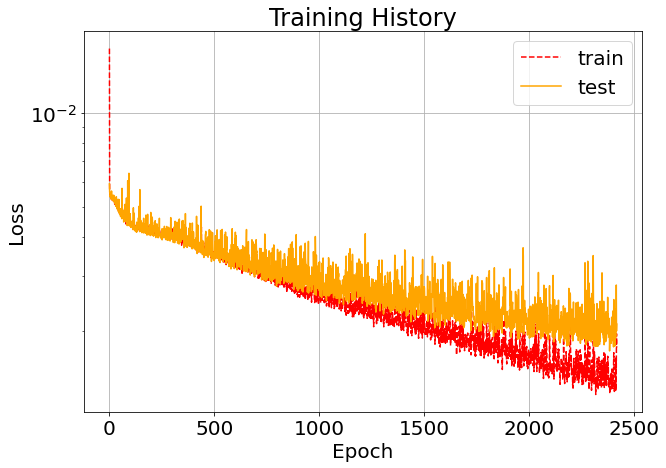

In [15]:
plt.figure(figsize=(10,7))
plt.semilogy(training.history['loss'], ls='--', color='red', label='train')
plt.semilogy(training.history['val_loss'], color='orange', label='test')
plt.grid()
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.title("Training History")
plt.legend()
plt.show()

### 6. Predict EoS and compare with data

Evaluate model with validation data and de-normalize data and prediction.

In [16]:
x = x_vl
y = y_vl
pd = np.array(model(x))

# De-normalize data and prediction
pr = np.min(P) + (np.max(P) - np.min(P)) * pd
dt = np.min(P) + (np.max(P) - np.min(P)) * y

Choose a random $M-R$ curve and predict the corresponding EoS. Plot the predicted EoS and the data for comparison.

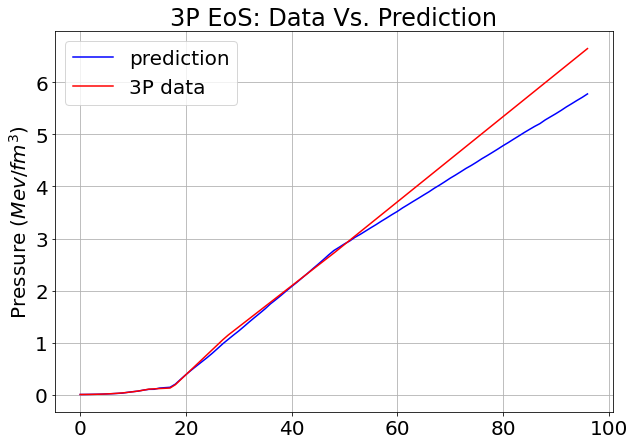

In [17]:
i = np.random.choice(x_vl.shape[0])

plt.figure(figsize=(10,7))
plt.plot(pr[i], color='blue', label='prediction')
plt.plot(dt[i], color='red', label='3P data')

plt.title("3P EoS: Data Vs. Prediction")
plt.ylabel("Pressure ($Mev/fm^3$)")
plt.legend()
plt.grid()
#plt.savefig(f"{FIGS}/real_vs_models.png")
plt.show()